In [5]:
import pandas as pd
d2=pd.read_csv('/content/churn_prprocessed.csv')

In [6]:
# dividing dataset into features and labels
X=d2.loc[:, d2.columns!='Churn']
Y=d2.Churn
print(X.shape , Y.shape)

(7043, 20) (7043,)


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test,Y_train, Y_val_and_test =train_test_split(X,Y, test_size=0.3)
X_val,X_test,Y_val,Y_test =train_test_split(X_val_and_test,Y_val_and_test, test_size=0.5)  # splitting validation and test sets
print(X_train.shape, X_val.shape ,X_test.shape ,Y_train.shape, Y_val.shape,Y_test.shape)

(4930, 20) (1056, 20) (1057, 20) (4930,) (1056,) (1057,)


Building Model Architecture

In [84]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop, Adadelta, Adam
from keras.regularizers import l2
model=Sequential([
Dense(64, activation='relu',kernel_regularizer=l2(0.001), input_shape=(20,)),
Dense(64, activation='relu',kernel_regularizer=l2(0.001)),
Dense(32, activation='relu'),
Dense(1, activation='sigmoid'),    
])
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 64)                1344      
_________________________________________________________________
dense_32 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_33 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 33        
Total params: 7,617
Trainable params: 7,617
Non-trainable params: 0
_________________________________________________________________
None


In [85]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])   #configuring the model

In [86]:
hist=model.fit(X_train, Y_train, epochs=100 ,batch_size=32 , validation_data=(X_val,Y_val))  #training the model

Epoch 1/100
155/155 [==============================] - 0s 2ms/step - loss: 8.1568 - accuracy: 0.6446 - val_loss: 4.6418 - val_accuracy: 0.7348
Epoch 2/100
155/155 [==============================] - 0s 2ms/step - loss: 4.3395 - accuracy: 0.6738 - val_loss: 3.4403 - val_accuracy: 0.7320
Epoch 3/100
155/155 [==============================] - 0s 1ms/step - loss: 4.7357 - accuracy: 0.6763 - val_loss: 6.4675 - val_accuracy: 0.7330
Epoch 4/100
155/155 [==============================] - 0s 1ms/step - loss: 3.7460 - accuracy: 0.6880 - val_loss: 7.5381 - val_accuracy: 0.7311
Epoch 5/100
155/155 [==============================] - 0s 1ms/step - loss: 3.1087 - accuracy: 0.6988 - val_loss: 6.7491 - val_accuracy: 0.4508
Epoch 6/100
155/155 [==============================] - 0s 2ms/step - loss: 3.1087 - accuracy: 0.7006 - val_loss: 2.4321 - val_accuracy: 0.6553
Epoch 7/100
155/155 [==============================] - 0s 1ms/step - loss: 2.4427 - accuracy: 0.7008 - val_loss: 2.2544 - val_accuracy: 0.7509

In [87]:
model.evaluate(X_test,Y_test)[1]

34/34 [==============================] - 0s 1ms/step - loss: 0.5098 - accuracy: 0.7654


0.765373706817627

Visualising Accuracy and loss:

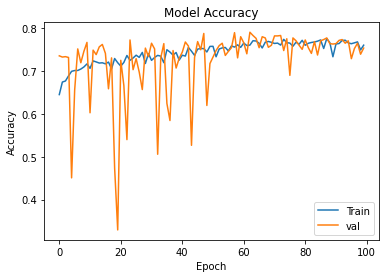

In [88]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','val'],loc='lower right')
plt.show()